<a href="https://colab.research.google.com/github/TariqIjaz/data-analyst/blob/main/Ecommerce_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ecommerce Sales Analysis**

   **Context**: Jayw Hypermarket has multiple outlets in different regions within United States (North,South,East,West). They sell a variety of products ranging from Electronics, Accessories and Wearables.

   **Objective**: To analyze Jayw's 2023 historical data to gather insights on customer purchasing patterns and make recommendations for business growth
   

# Insights

### 1. Top Customers Drive a Significant Portion of Revenue
- The top 10 customers contribute disproportionately to overall revenue, with the highest spender contributing substantially more than the average customer.
- The segmentation analysis indicates high-value customers can be clustered into distinct spending and frequency patterns.

---

### 2. Regional Sales Performance
- **West** is the top-performing region in terms of total sales, while **South** and **North** regions have comparatively lower sales.
- Regional segmentation indicates that some regions underperform despite having a notable number of orders.

---

### 3. Category-wise Sales
- **Electronics** dominate overall sales, contributing significantly more revenue than other categories like **Accessories** and **Wearables**.
- Within Electronics, products such as **Laptops** and **Monitors** are the most popular, generating the highest revenue.

---

### 4. Shipping Performance
- **Returned orders** account for a notable percentage of overall orders, leading to potential revenue loss and increased costs.
- **Shipping fees** vary significantly by region, with certain regions incurring disproportionately high shipping costs, potentially affecting profitability.

---

### 5. Sales Trends Over Time
- Monthly sales exhibit **seasonal trends**, with notable peaks during specific months. These trends could be aligned with promotions, holidays, or seasonal demand.

---

### 6. Customer Segmentation
- Customers can be segmented into three key groups based on spending and frequency:
  1. **High-value, low-frequency customers**: Spend the most but shop less often.
  2. **Medium-value, medium-frequency customers**: Moderate spending and regular shopping patterns.
  3. **Low-value, high-frequency customers**: Frequent shoppers with relatively low spending.

---

# Recommendations

### **For Retaining Top Customers**
#### Loyalty Program:
- Introduce a loyalty program for high-value customers with perks like discounts, early access to sales, or free shipping to incentivize repeat purchases.
- Example: Target customers spending over $5,000 annually with exclusive offers.

#### Personalized Offers:
- Use segmentation insights to tailor promotional campaigns to high-value customers, offering bundles or discounts on frequently purchased items.

---

### **For Regional Optimization**
#### Focus on Underperforming Regions:
- Invest in targeted marketing campaigns in **South** and **North** regions to boost sales.
- Collaborate with regional influencers or advertise region-specific promotions.

#### Optimize Regional Shipping Fees:
- Negotiate better shipping contracts for high-cost regions or introduce a flat-rate shipping model to improve customer satisfaction.

---

### **For Product and Category Strategy**
#### Expand High-Performing Categories:
- Increase inventory and marketing focus on top-performing categories like **Electronics**, particularly **Laptops** and **Monitors**.
- Consider phasing out or re-evaluating underperforming products in less popular categories like **Accessories**.

#### Introduce Related Products:
- Use cross-selling strategies to recommend complementary products, such as offering **Accessories** with **Electronics** purchases.

---

### **For Improving Shipping Performance**
#### Reduce Returns:
- Analyze reasons for returns (e.g., product quality, delivery issues) and address them proactively.
- Offer virtual try-on tools or detailed size guides for products prone to returns.

#### Monitor Shipping Status:
- Ensure better tracking and communication for **In Transit** orders to reduce delays and enhance customer satisfaction.

---

### **For Seasonal and Trend-Based Promotions**
#### Capitalize on Seasonal Peaks:
- Align promotional campaigns with seasonal peaks in sales, such as holiday discounts or back-to-school promotions.
- Example: Run electronics discounts during December to align with holiday demand.

#### Dynamic Pricing Strategy:
- Use historical data to implement a dynamic pricing model, increasing prices slightly during high-demand periods to maximize profit.

---

### **For Long-Term Growth**
#### Customer Segment Strategies:
- **High-value customers**: Focus on retention with loyalty perks.
- **Medium-value customers**: Encourage increased spending through upselling and cross-selling.
- **Low-value customers**: Drive loyalty through discounts and low-cost shipping options.

#### Data-Driven Marketing:
- Regularly update customer and sales segmentation to identify shifting trends and emerging opportunities.


#**Data Analysis:**

##2) Data Preparation

###2.1) Importing Basic Libraries


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 11
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


###2.1) Loading Dataset


In [3]:
from google.colab import drive
drive.mount('/content/drive')

file_path ='/content/drive/MyDrive/realistic_e_commerce_sales_data.csv'

df=pd.read_csv(file_path)

Mounted at /content/drive


In [4]:
df.head(20)

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
0,CUST0268,Male,North,NaN,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08
1,CUST0046,Male,West,22.0,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09
2,CUST0169,Female,South,54.0,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28
3,CUST0002,Male,North,23.0,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18
4,CUST0173,Female,South,NaN,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19
5,CUST0147,Male,North,64.0,Smartwatch,Wearables,200.0,2,400,11.26,In Transit,2023-01-11
6,CUST0262,Male,East,27.0,Smartwatch,Wearables,200.0,1,200,18.38,In Transit,2023-10-23
7,CUST0159,Female,South,18.0,Keyboard,Accessories,50.0,2,100,15.08,Returned,2023-06-15
8,CUST0046,Female,East,22.0,Mouse,Accessories,30.0,1,30,8.22,Returned,2023-02-25
9,CUST0023,Male,West,29.0,Headphones,Accessories,100.0,3,300,10.70,Delivered,2023-04-23


###2.3) Initial Analysis on Dataset

In [5]:
# Check for duplicates
df['Customer ID'].duplicated().any()

True

In [6]:
df.shape

(1000, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      1000 non-null   object 
 1   Gender           1000 non-null   object 
 2   Region           950 non-null    object 
 3   Age              900 non-null    float64
 4   Product Name     1000 non-null   object 
 5   Category         1000 non-null   object 
 6   Unit Price       1000 non-null   float64
 7   Quantity         1000 non-null   int64  
 8   Total Price      1000 non-null   int64  
 9   Shipping Fee     1000 non-null   float64
 10  Shipping Status  950 non-null    object 
 11  Order Date       1000 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 93.9+ KB


In [8]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Region,50
Age,100
Product Name,0
Category,0
Unit Price,0
Quantity,0
Total Price,0
Shipping Fee,0


###2.3.1) Analysis Output

* The Dataset comprises of 1000 rows and 12 columns

* There are 50 missing values for the region and shipping status columns and there are 100 missing valus for the age column

* The type of variables in the dataset are both categorical and numerical format (Object, Integer and Float)

## 3. Preparation for Exploratory Data Analysis(EDA)

### 3.1 Examining unique values and data split

In [9]:
df.head()

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
0,CUST0268,Male,North,NaN,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08
1,CUST0046,Male,West,22.0,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09
2,CUST0169,Female,South,54.0,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28
3,CUST0002,Male,North,23.0,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18
4,CUST0173,Female,South,NaN,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19


In [10]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
Customer ID,292
Gender,2
Region,4
Age,52
Product Name,7
Category,3
Unit Price,13
Quantity,5
Total Price,26
Shipping Fee,730


In [11]:
# List numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# List categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Count the columns
num_cols_count = len(numerical_columns)
cat_cols_count = len(categorical_columns)

# Print results
print(f"Numerical columns ({num_cols_count}): {numerical_columns}")
print(f"Categorical columns ({cat_cols_count}): {categorical_columns}")



Numerical columns (5): ['Age', 'Unit Price', 'Quantity', 'Total Price', 'Shipping Fee']
Categorical columns (7): ['Customer ID', 'Gender', 'Region', 'Product Name', 'Category', 'Shipping Status', 'Order Date']


### 3.2 Separating Variables (Numeric or Catgorical)

In [12]:
df.head()

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
0,CUST0268,Male,North,NaN,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08
1,CUST0046,Male,West,22.0,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09
2,CUST0169,Female,South,54.0,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28
3,CUST0002,Male,North,23.0,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18
4,CUST0173,Female,South,NaN,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19


In [13]:
numerical_data = ['Age', 'Unit Price', 'Quantity', 'Total Price', 'Shipping Fee']
categorical_data = ['Customer ID', 'Gender', 'Region', 'Product Name', 'Category', 'Shipping Status', 'Order Date']

###3.3 Data Cleaning and Preprocessing


In [14]:
df.isnull().sum()


,0
Customer ID,0
Gender,0
Region,50
Age,100
Product Name,0
Category,0
Unit Price,0
Quantity,0
Total Price,0
Shipping Fee,0


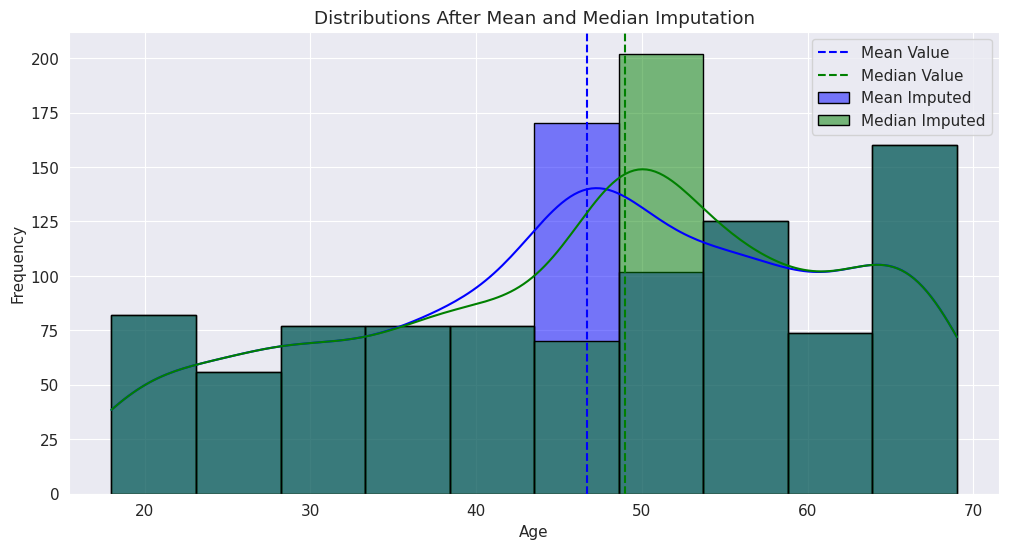

Skewness after mean imputation: -0.2858782841889676
Skewness after median imputation: -0.33303802025498397


In [15]:
# Impute missing values
df_mean_imputed = df.copy()
df_mean_imputed['Age'] = df['Age'].fillna(df['Age'].mean())

df_median_imputed = df.copy()
df_median_imputed['Age'] = df['Age'].fillna(df['Age'].median())

# Plot distributions
plt.figure(figsize=(12, 6))

# Mean imputation plot
sns.histplot(df_mean_imputed['Age'], kde=True, color='blue', label='Mean Imputed', bins=10, edgecolor='k')
plt.axvline(df_mean_imputed['Age'].mean(), color='blue', linestyle='--', label='Mean Value')

# Median imputation plot
sns.histplot(df_median_imputed['Age'], kde=True, color='green', label='Median Imputed', bins=10, edgecolor='k')
plt.axvline(df_median_imputed['Age'].median(), color='green', linestyle='--', label='Median Value')

plt.legend()
plt.title('Distributions After Mean and Median Imputation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness
mean_skewness = df_mean_imputed['Age'].skew()
median_skewness = df_median_imputed['Age'].skew()

print(f"Skewness after mean imputation: {mean_skewness}")
print(f"Skewness after median imputation: {median_skewness}")


In [16]:
#Since the skewness is does not differ much we will impute using the mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [17]:
df.isnull().sum()


,0
Customer ID,0
Gender,0
Region,50
Age,0
Product Name,0
Category,0
Unit Price,0
Quantity,0
Total Price,0
Shipping Fee,0


In [34]:
#Since Region and shipping status is categorical, we can fill missing values with the mode (most frequent value) of the column.

# Mode imputation for Region
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])

# Mode imputation for Shipping Status
df['Shipping Status'] = df['Shipping Status'].fillna(df['Shipping Status'].mode()[0])

# Check remaining missing values
print(df.isnull().sum())


Order Date         0
index              0
Customer ID        0
Gender             0
Region             0
Age                0
Product Name       0
Category           0
Unit Price         0
Quantity           0
Total Price        0
Shipping Fee       0
Shipping Status    0
dtype: int64


In [19]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [20]:
df.reset_index(inplace=True)

Summary of the above Analysis:
   * The age and trtbps parameters are almost normally distributed.
   * In case of the "Chol" parameter while the data seems normally distributed, it is infact skewed due to presence of outliers shown by the bumps in the tail of the graph.
   * Thalach is skewed to the left as can be seen by the fact that the peak lies on the left og the mean value.
   * Oldpeak is right skewed as the peak is occuring on the right of the dotted line.

## 4. Exploratory Data Analysis


###4.1 Sales Analysis


In [21]:
#Total Sales by region
df.groupby('Region')['Total Price'].sum().sort_values(ascending=False)

,Total Price
Region,
West,390620
East,329950
North,324990
South,301040


In [22]:
#Total Sales by Gender
df.groupby('Gender')['Total Price'].sum().sort_values(ascending=False)

,Total Price
Gender,
Male,715590
Female,631010


In [23]:
#Total Sales by Category
df.groupby('Category')['Total Price'].sum().sort_values(ascending=False)

,Total Price
Category,
Electronics,1200500
Wearables,74200
Accessories,71900


In [24]:
#Total Sales by Product
df.groupby('Product Name')['Total Price'].sum().sort_values(ascending=False)

,Total Price
Product Name,
Laptop,696000
Smartphone,353600
Monitor,150900
Smartwatch,74200
Headphones,37000
Keyboard,22900
Mouse,12000


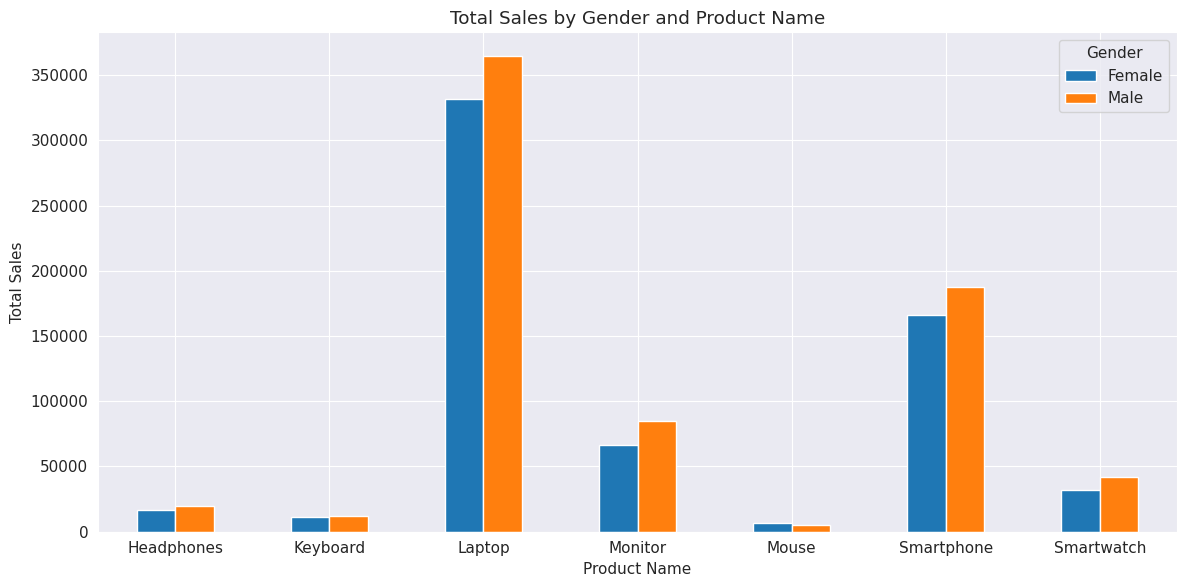

In [25]:

# Group by 'Gender' and 'Product Name' and calculate total sales
sales_by_region_product = df.groupby(['Gender', 'Product Name'])['Total Price'].sum().reset_index()

# Pivot data for easier visualization
pivot_data = sales_by_region_product.pivot(index='Product Name', columns='Gender', values='Total Price').fillna(0)

# Plot grouped bar chart
pivot_data.plot(kind='bar', figsize=(12, 6))

plt.title('Total Sales by Gender and Product Name')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

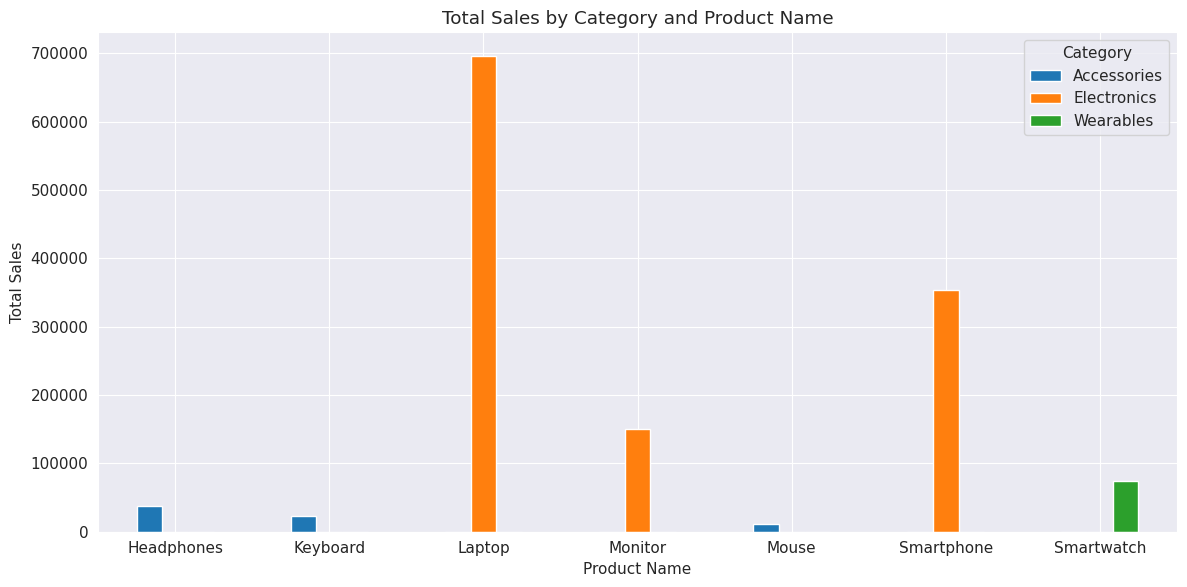

In [26]:

# Group by 'Category' and 'Product Name' and calculate total sales
sales_by_region_product = df.groupby(['Category', 'Product Name'])['Total Price'].sum().reset_index()

# Pivot data for easier visualization
pivot_data = sales_by_region_product.pivot(index='Product Name', columns='Category', values='Total Price').fillna(0)

# Plot grouped bar chart
pivot_data.plot(kind='bar', figsize=(12, 6))

plt.title('Total Sales by Category and Product Name')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

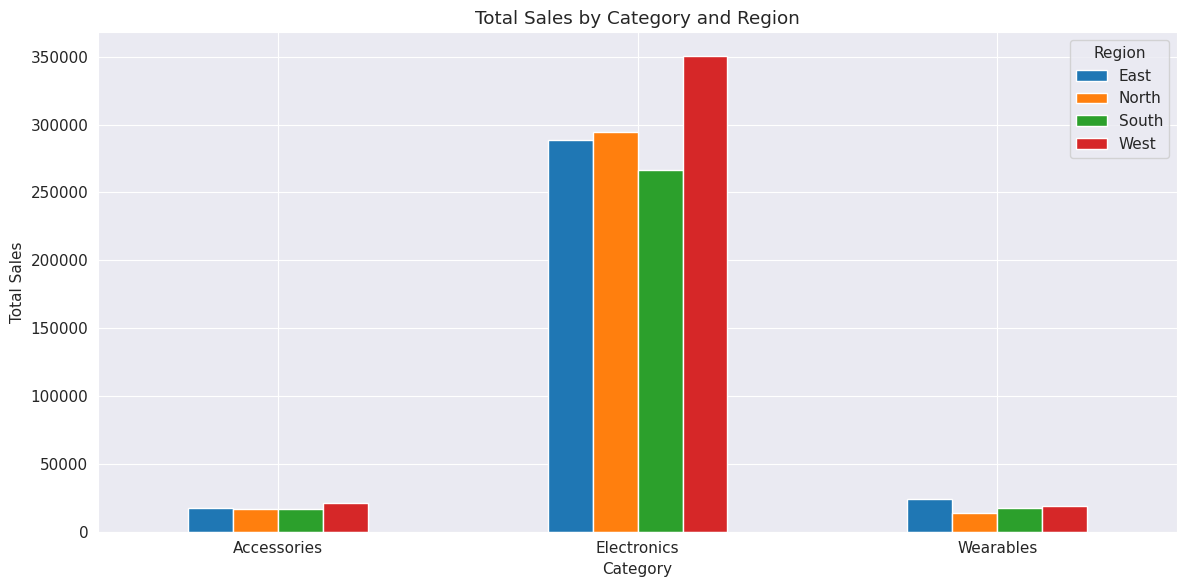

In [27]:

# Group by 'Region' and 'Category' and calculate total sales
sales_by_region_product = df.groupby(['Region', 'Category'])['Total Price'].sum().reset_index()

# Pivot data for easier visualization
pivot_data = sales_by_region_product.pivot(index='Category', columns='Region', values='Total Price').fillna(0)

# Plot grouped bar chart
pivot_data.plot(kind='bar', figsize=(12, 6))

plt.title('Total Sales by Category and Region')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

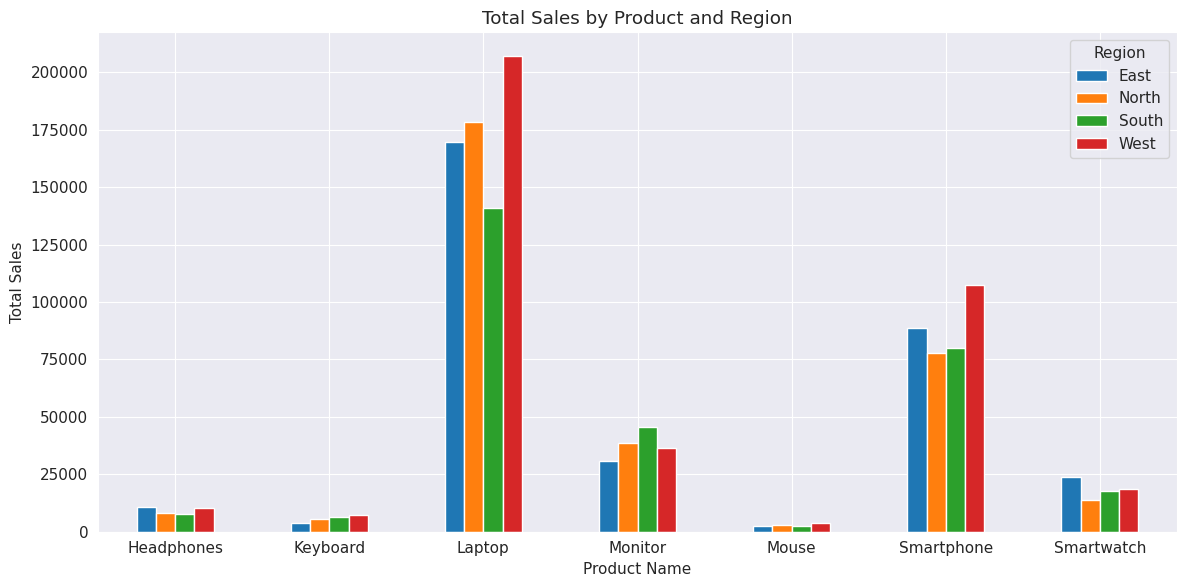

In [28]:

# Group by 'Region' and 'Product Name' and calculate total sales
sales_by_region_product = df.groupby(['Region', 'Product Name'])['Total Price'].sum().reset_index()

# Pivot data for easier visualization
pivot_data = sales_by_region_product.pivot(index='Product Name', columns='Region', values='Total Price').fillna(0)

# Plot grouped bar chart
pivot_data.plot(kind='bar', figsize=(12, 6))

plt.title('Total Sales by Product and Region')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Region')
plt.tight_layout()
plt.show()


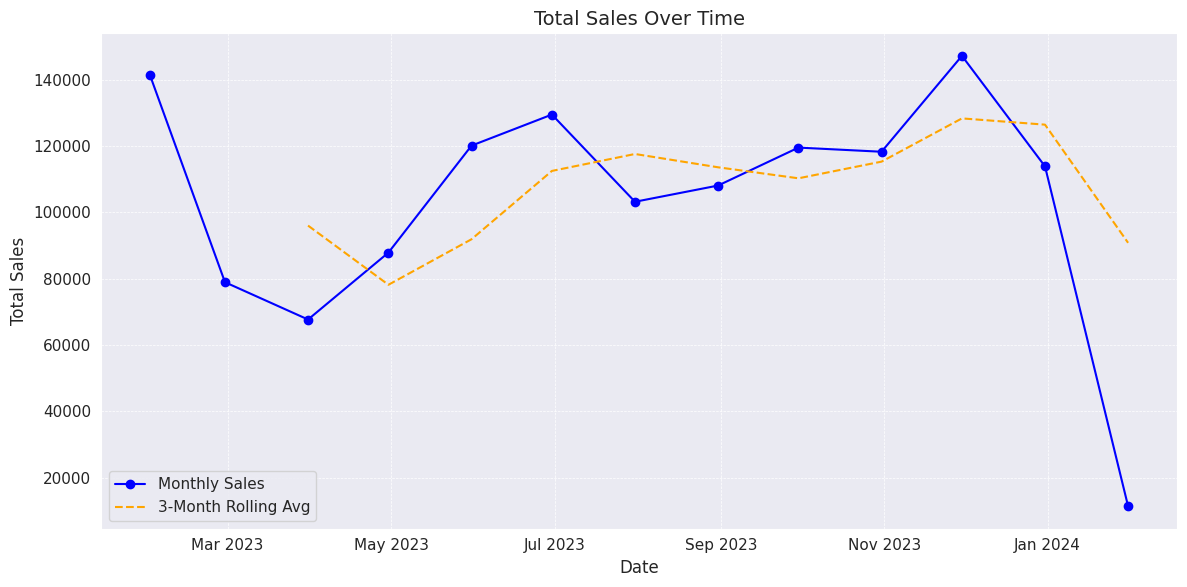

In [29]:
df.set_index('Order Date', inplace=True)

# Resample sales by month and calculate total sales
monthly_sales = df['Total Price'].resample('ME').sum()

# Plot total sales over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', label='Monthly Sales', color='blue')

# Add a rolling average for trend (optional)
rolling_avg = monthly_sales.rolling(window=3).mean()
plt.plot(rolling_avg.index, rolling_avg.values, linestyle='--', label='3-Month Rolling Avg', color='orange')

# Customize plot
plt.title('Total Sales Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

# Format x-axis for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=0)

# Show plot
plt.show()


In [30]:
df.reset_index(inplace=True)

###4.2 Customer Behaviour Analysis


In [31]:
# Count the number of unique orders per customer
customer_orders = df.groupby('Customer ID').size().reset_index(name='Order Count')

# Calculate the total spending per customer
customer_spending = df.groupby('Customer ID')['Total Price'].sum().reset_index(name='Total Spending')

# Merge order count and spending data
customer_behavior = pd.merge(customer_orders, customer_spending, on='Customer ID')

# Identify top customers by spending
top_customers = customer_behavior.sort_values(by='Total Spending', ascending=False).head(10)
print("Top 10 Customers by Spending:")
print(top_customers)

# Segment customers by region
customer_region = df.groupby(['Region', 'Customer ID']).size().reset_index(name='Order Count')
print("Customer Segmentation by Region:")
print(customer_region.head())


Top 10 Customers by Spending:
    Customer ID  Order Count  Total Spending
197    CUST0204            9           29100
93     CUST0095            9           22440
127    CUST0131            8           21180
134    CUST0139            7           18350
272    CUST0281            8           17850
139    CUST0144            5           17320
193    CUST0200            4           16700
190    CUST0197            5           16150
63     CUST0064            7           14600
284    CUST0293            5           14200
Customer Segmentation by Region:
  Region Customer ID  Order Count
0   East    CUST0001            2
1   East    CUST0002            1
2   East    CUST0005            1
3   East    CUST0006            2
4   East    CUST0007            2


In [32]:
# Perform clustering based on customer behavior (using total spending and order count)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
clustering_data = customer_behavior[['Order Count', 'Total Spending']].copy()
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_behavior['Segment'] = kmeans.fit_predict(clustering_data_scaled)

# Analyze customer segments
segments_summary = customer_behavior.groupby('Segment')[['Order Count', 'Total Spending']].mean()
print("Customer Segments Summary:")
print(segments_summary)


Customer Segments Summary:
         Order Count  Total Spending
Segment                             
0           6.106383    11110.212766
1           1.889831     1392.881356
2           3.858268     5197.322835


###4.3 Analyzing Shipping Performance

In [33]:
# Analyze shipping status proportions
shipping_status_counts = df['Shipping Status'].value_counts(normalize=True) * 100
print("Shipping Status Proportions (%):")
print(shipping_status_counts)

# Calculate average shipping fee by region
avg_shipping_fee_region = df.groupby('Region')['Shipping Fee'].mean().reset_index(name='Avg Shipping Fee')
print("Average Shipping Fee by Region:")
print(avg_shipping_fee_region)

# Calculate average shipping fee by category
avg_shipping_fee_category = df.groupby('Category')['Shipping Fee'].mean().reset_index(name='Avg Shipping Fee')
print("Average Shipping Fee by Category:")
print(avg_shipping_fee_category)


Shipping Status Proportions (%):
Shipping Status
In Transit    37.9
Delivered     31.3
Returned      30.8
Name: proportion, dtype: float64
Average Shipping Fee by Region:
  Region  Avg Shipping Fee
0   East         12.316840
1  North         12.548515
2  South         12.399385
3   West         12.405878
Average Shipping Fee by Category:
      Category  Avg Shipping Fee
0  Accessories         12.198279
1  Electronics         12.615765
2    Wearables         12.353770
